In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('data/feature_df.csv')
y = np.array(df["#label"])
X = df.drop(["#id", "#label"],  axis='columns')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 29 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   #label                                              885 non-null    float64
 1   #id                                                 885 non-null    object 
 2   average_sentence_length_in_token                    885 non-null    float64
 3   average_characters_per_word                         885 non-null    float64
 4   average_syllables_per_word                          885 non-null    float64
 5   text_length_in_token                                885 non-null    int64  
 6   average_number_of_noun_phrases_per_sentence         885 non-null    float64
 7   average_heights                                     885 non-null    float64
 8   average_number_of_subordinate_clauses_per_sentence  885 non-null    float64
 9  

In [14]:
df.describe()

,#label,average_sentence_length_in_token,average_characters_per_word,average_syllables_per_word,text_length_in_token,average_number_of_noun_phrases_per_sentence,average_heights,average_number_of_subordinate_clauses_per_sentence,average_count_of_sentences_with_verb_as_root,average_count_of_sentences_with_nouns_as_root,...,POS_tag_proportion_for_numerales,POS_tag_proportion_for_adpositions,ttr,lexical_complexity_score,average_number_of_verbs_in_sentence,average_count_of_pronouns_per_sentence,average_count_of_definite_articles_per_sentence,average_semantic_similarity_of_all_nouns,average_semantic_similarity_of_all_verbs,average_semantic_similarity_of_all_adjectives\r\n
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,0.500000,11.011828,5.492732,1.966788,179.377401,3.544651,4.784532,0.521438,0.403331,0.050860,...,0.209746,0.110247,0.605622,8.291483,1.428460,0.604057,1.055684,0.209073,0.399926,0.228938
std,0.408479,4.430873,0.703276,0.287375,103.202016,1.477773,1.211761,0.483947,0.170725,0.063408,...,0.058737,0.027993,0.090138,0.608296,0.491815,0.320564,0.743620,0.066871,0.092901,0.100795
min,0.000000,4.312500,4.202128,1.485981,12.000000,1.333333,2.666667,0.000000,0.000000,0.000000,...,0.076923,0.000000,0.391304,6.277521,0.555556,0.000000,0.000000,0.025492,0.000000,-0.187130
25%,0.000000,7.550000,4.988189,1.759036,103.000000,2.444444,3.892857,0.166667,0.307692,0.000000,...,0.176744,0.091811,0.542945,7.871410,1.076923,0.400000,0.555556,0.163882,0.365804,0.174364
50%,0.500000,10.047619,5.274775,1.879562,153.000000,3.260870,4.534884,0.428571,0.410256,0.040000,...,0.196262,0.109756,0.593939,8.268732,1.333333,0.562500,0.850000,0.204456,0.405177,0.221073
75%,1.000000,13.111111,6.003367,2.154930,238.000000,4.230769,5.350000,0.714286,0.500000,0.083333,...,0.226744,0.127168,0.657303,8.718271,1.666667,0.793103,1.363636,0.246890,0.447732,0.280196
max,1.000000,46.000000,7.821429,3.062500,544.000000,18.000000,12.000000,3.600000,1.000000,0.500000,...,0.722892,0.232143,1.000000,10.332035,5.000000,3.000000,6.000000,0.790869,0.784351,0.734285


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [43]:
sgdr = SGDRegressor()
print(sgdr)

SGDRegressor()


In [44]:
sgdr.fit(X_train, y_train)

score = sgdr.score(X_train, y_train)
print("R-squared:", score)

R-squared: -5.775462913190089e+27


In [45]:
cv_score = cross_val_score(sgdr, X, y, cv = 10)
print("CV mean score: ", cv_score.mean())


CV mean score:  -2.722585300901388e+27


In [46]:
y_pred = sgdr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 


MSE:  1.0031317538492686e+27
RMSE:  31672255269387.883


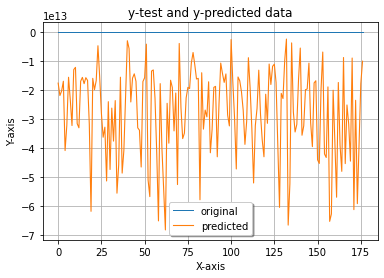

In [47]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [49]:
y_test

array([1. , 0. , 0. , 0. , 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 0.5, 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 1. , 1. , 0. ,
       0.5, 0.5, 1. , 0. , 0.5, 0. , 1. , 0. , 1. , 1. , 0. , 0.5, 0.5,
       1. , 1. , 0. , 1. , 0. , 1. , 0. , 0.5, 0.5, 1. , 0. , 0. , 1. ,
       1. , 0.5, 0. , 0. , 0. , 0.5, 0.5, 1. , 0.5, 0.5, 1. , 0.5, 0.5,
       0. , 0. , 1. , 0. , 1. , 1. , 0. , 0.5, 1. , 1. , 0. , 0. , 1. ,
       1. , 0. , 0. , 0. , 0.5, 0. , 1. , 0. , 1. , 0. , 0.5, 0.5, 1. ,
       0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 1. , 1. , 0. , 1. , 0.5,
       0. , 1. , 0. , 0. , 0.5, 0.5, 1. , 0. , 0.5, 0.5, 0.5, 1. , 0. ,
       0.5, 1. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 1. , 0.5, 0. ,
       0. , 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 0.5,
       0. , 0. , 0. , 0.5, 1. , 0. , 0. , 0.5, 0.5, 0. , 1. , 0.5, 1. ,
       0.5, 0.5, 0.5, 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0.5, 0.5,
       1. , 1. , 1. , 0.5, 0.5, 0.5, 1. , 1. ])

In [50]:
y_pred

array([-1.75617605e+13, -2.18497621e+13, -2.02602431e+13, -1.69184008e+13,
       -4.08440537e+13, -3.21587034e+13, -1.55383821e+13, -2.32765040e+13,
       -3.22075294e+13, -1.29013904e+13, -1.21109606e+13, -3.15440789e+13,
       -3.29867228e+13, -1.69238804e+13, -1.55751125e+13, -1.77495997e+13,
       -1.56790202e+13, -1.66369714e+13, -3.17411759e+13, -6.18200603e+13,
       -1.59088566e+13, -1.98341517e+13, -1.66776597e+13, -4.65735749e+12,
       -1.53831808e+13, -2.79807684e+13, -3.62452427e+13, -3.27620727e+13,
       -5.13450916e+13, -2.39679300e+13, -4.73749757e+13, -2.61870457e+13,
       -3.75799889e+13, -2.35869028e+13, -5.55537517e+13, -4.57783399e+13,
       -1.55194858e+13, -4.86245261e+13, -4.07124675e+13, -2.16203727e+13,
       -2.92588072e+12, -5.63342822e+12, -2.40714734e+13, -1.58314909e+13,
       -1.43612156e+13, -1.69640342e+13, -3.29938452e+13, -3.38112088e+13,
       -4.65249460e+13, -1.70318930e+13, -1.57021569e+13, -4.11130182e+12,
       -5.10254800e+13, -

In [51]:
y_train

array([0.5, 0. , 1. , 0. , 1. , 0. , 0.5, 0. , 1. , 0.5, 1. , 1. , 1. ,
       0. , 0.5, 1. , 1. , 0. , 0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 0. ,
       0.5, 1. , 0.5, 0.5, 1. , 1. , 1. , 0. , 1. , 0.5, 1. , 1. , 1. ,
       0.5, 1. , 0.5, 0.5, 1. , 0.5, 0. , 1. , 0. , 1. , 0. , 0. , 1. ,
       0.5, 0. , 0. , 0. , 0.5, 1. , 0. , 1. , 1. , 0.5, 0. , 0. , 1. ,
       0.5, 0. , 1. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0.5, 0.5, 1. ,
       0. , 0. , 0.5, 1. , 0.5, 1. , 0. , 0.5, 0.5, 0.5, 1. , 0.5, 1. ,
       0.5, 0.5, 0. , 0. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 0. , 0. , 1. ,
       1. , 1. , 0. , 0. , 1. , 0.5, 0. , 1. , 0.5, 0.5, 0. , 0.5, 0. ,
       0. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 1. , 0. , 1. ,
       0. , 0.5, 0. , 0.5, 1. , 0. , 1. , 0.5, 0.5, 1. , 0. , 0. , 0. ,
       0.5, 0.5, 1. , 0. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 0. ,
       0. , 0.5, 1. , 1. , 0.5, 0. , 0. , 1. , 0.5, 1. , 1. , 0.5, 0. ,
       1. , 0.5, 0.5, 0. , 0.5, 1. , 0.5, 0.5, 1. , 0. , 0. , 0.